In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# results_base_dir = "results_randseed_geo_only/"
results_base_dir = "results-appendix-15/"

In [3]:
# case_studies = [
#     "1h-none-noSUSD",
#     "1h-cheap-relaxedSUSD",
#     "1h-cheap-tightSUSD",
#     "1h-expensive-relaxedSUSD",
#     "1h-expensive-tightSUSD",
#     "2h-none-noSUSD",
#     "2h-cheap-relaxedSUSD",
#     "2h-cheap-tightSUSD",
#     "2h-expensive-relaxedSUSD",
#     "2h-expensive-tightSUSD",
#     "3h-none-noSUSD",
#     "3h-cheap-relaxedSUSD",
#     "3h-cheap-tightSUSD",
#     "3h-expensive-relaxedSUSD",
#     "3h-expensive-tightSUSD",
#     "4h-none-noSUSD",
#     "4h-cheap-relaxedSUSD",
#     "4h-cheap-tightSUSD",
#     "4h-expensive-relaxedSUSD",
#     "4h-expensive-tightSUSD",
#     "5h-none-noSUSD",
#     "5h-cheap-relaxedSUSD",
#     "5h-cheap-tightSUSD",
#     "5h-expensive-relaxedSUSD",
#     "5h-expensive-tightSUSD",
#     "geographical-none-noSUSD",
#     "geographical-cheap-relaxedSUSD",
#     "geographical-cheap-tightSUSD",
#     "geographical-expensive-relaxedSUSD",
#     "geographical-expensive-tightSUSD",
# ]

case_studies = [
    "1h-none-noSUSD",
    "1h-expensive-relaxedSUSD",
    "1h-expensive-tightSUSD",
    "2h-none-noSUSD",
    "2h-expensive-relaxedSUSD",
    "2h-expensive-tightSUSD",
    "3h-none-noSUSD",
    "3h-expensive-relaxedSUSD",
    "3h-expensive-tightSUSD",
    "4h-none-noSUSD",
    "4h-expensive-relaxedSUSD",
    "4h-expensive-tightSUSD",
    "5h-none-noSUSD",
    "5h-expensive-relaxedSUSD",
    "5h-expensive-tightSUSD",
    "geographical-none-noSUSD",
    "geographical-expensive-relaxedSUSD",
    "geographical-expensive-tightSUSD",
]

# case_studies = [
#     "geographical-none-noSUSD",
#     "geographical-cheap-relaxedSUSD",
#     "geographical-cheap-tightSUSD",
#     "geographical-expensive-relaxedSUSD",
#     "geographical-expensive-tightSUSD",
# ]

In [4]:
capacity_sums = []

for case_study in case_studies:
    df = pd.read_csv(results_base_dir + case_study+ "/" + "var_assets_investment" + '.csv')
    
    df['asset_type'] = df['asset'].str[3:]
    df['total_capacity'] = df['capacity'] * df['solution']
    
    
    ##########################
    df_extra = pd.read_csv(results_base_dir + case_study + "/" + "var_assets_investment_energy.csv") 
    
    df_extra['asset'] = df_extra['asset'] + '_storage'
    
    df_extra['asset_type'] = df_extra['asset'].str[3:]
    df_extra['total_capacity'] = df_extra['capacity_storage_energy'] * df_extra['solution']
    
    df_combined = pd.concat([df, df_extra], ignore_index=True)
    
    ############################
    
    
    capacity_sums.append(df_combined.groupby('asset_type')['total_capacity'].sum().rename(case_study))
    

In [5]:
combined_investment_sums = pd.concat(capacity_sums, axis=1)

In [6]:
for case_study in case_studies[1:]:
    combined_investment_sums[f'diff_{case_study}'] = 100 * (combined_investment_sums[case_study] - combined_investment_sums[case_studies[0]]) / combined_investment_sums[case_studies[0]]

In [7]:
combined_investment_sums = combined_investment_sums.fillna(0).round(2)
combined_investment_sums

,1h-none-noSUSD,1h-expensive-relaxedSUSD,1h-expensive-tightSUSD,2h-none-noSUSD,2h-expensive-relaxedSUSD,2h-expensive-tightSUSD,3h-none-noSUSD,3h-expensive-relaxedSUSD,3h-expensive-tightSUSD,4h-none-noSUSD,...,diff_3h-expensive-tightSUSD,diff_4h-none-noSUSD,diff_4h-expensive-relaxedSUSD,diff_4h-expensive-tightSUSD,diff_5h-none-noSUSD,diff_5h-expensive-relaxedSUSD,diff_5h-expensive-tightSUSD,diff_geographical-none-noSUSD,diff_geographical-expensive-relaxedSUSD,diff_geographical-expensive-tightSUSD
asset_type,,,,,,,,,,,,,,,,,,,,,
Battery,16203.71,19993.08,19661.09,8158.95,12330.59,13075.87,1782.68,3107.36,3339.80,507.50,...,-79.39,-96.87,-92.94,-95.55,-99.80,-98.53,-98.02,52.52,64.26,59.80
Battery_storage,26605.37,36751.74,34848.44,16612.66,25612.67,28220.70,5348.03,9322.08,10019.41,2029.99,...,-62.34,-92.37,-82.81,-89.15,-99.40,-95.51,-93.97,44.45,54.59,51.84
CCGT,44268.00,42483.00,41769.00,46053.00,44625.00,43911.00,47481.00,42840.00,43911.00,47838.00,...,-0.81,8.06,7.26,7.26,-6.45,-8.87,-8.06,-14.52,-24.19,-17.74
Coal,90640.00,90640.00,90640.00,92288.00,91464.00,91464.00,88168.00,93112.00,90640.00,87344.00,...,0.00,-3.64,-4.55,-3.64,8.18,7.27,6.36,5.45,6.36,6.36
Nuclear,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
OCGT,38199.00,37842.00,38556.00,37842.00,37485.00,37128.00,37128.00,37842.00,37485.00,35700.00,...,-1.87,-6.54,-6.54,-5.61,-54.21,-51.40,-51.40,-24.30,-20.56,-27.10
Solar,214749.21,217112.47,217020.93,216336.69,212351.20,216577.59,238390.30,237316.91,239058.61,242222.89,...,11.32,12.79,12.12,11.85,33.42,32.48,32.20,10.36,10.07,9.12
Wind_Offshore,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Wind_Onshore,717320.84,711276.96,714276.22,711371.43,713585.73,710384.63,704982.85,695773.80,699061.81,704877.60,...,-2.55,-1.73,-1.41,-1.57,-14.35,-13.71,-13.52,-4.12,-3.45,-3.37


In [8]:
# indices = [f"diff_{case}" for case in case_studies[1:]]
# data = combined_investment_sums[indices].values

In [9]:
def plot_heatmap(case_studies, combined_investment_sums=combined_investment_sums, add_labels=False, angle=90, title="WRONG TITLE"):
    for case_study in case_studies[1:]:
        combined_investment_sums[f'diff_{case_study}'] = 100 * (combined_investment_sums[case_study] - combined_investment_sums[case_studies[0]]) / combined_investment_sums[case_studies[0]]
    
    combined_investment_sums = combined_investment_sums.fillna(0).round(2)
    
    indices = [f"diff_{case}" for case in case_studies[1:]]
    data = combined_investment_sums[indices].values
    
    row_labels = combined_investment_sums.index.tolist()
    
    labels = case_studies.copy()
    
    for i in range(len(case_studies)):
#         print(case_studies[i].replace("tightSUSD", "full"))
        labels[i] = labels[i].replace("tightSUSD", "full")
        labels[i] = labels[i].replace("relaxedSUSD", "compact")
        labels[i] = labels[i].replace("noSUSD", "none")

    
    col_labels = labels[1:]
    
    range_peak = max(np.max(data), np.abs(np.min(data)))

    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    heatmap = ax.imshow(data, cmap='coolwarm', aspect='auto', vmin=-range_peak, vmax=range_peak)

    # Set ticks
    ax.set_xticks(np.arange(len(col_labels)))
    ax.set_yticks(np.arange(len(row_labels)))
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Rotate the column labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Add annotations (text inside cells)
    if add_labels:
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                text = f"{data[i, j]:.1f}"
                ax.text(j, i, text, ha="center", va="center", color="black", rotation=angle)

    # Add title and colorbar
    ax.set_title(title)
    fig.colorbar(heatmap, ax=ax, label='Percentage change in invested capacity [%]')
    plt.tight_layout()
    plt.show()

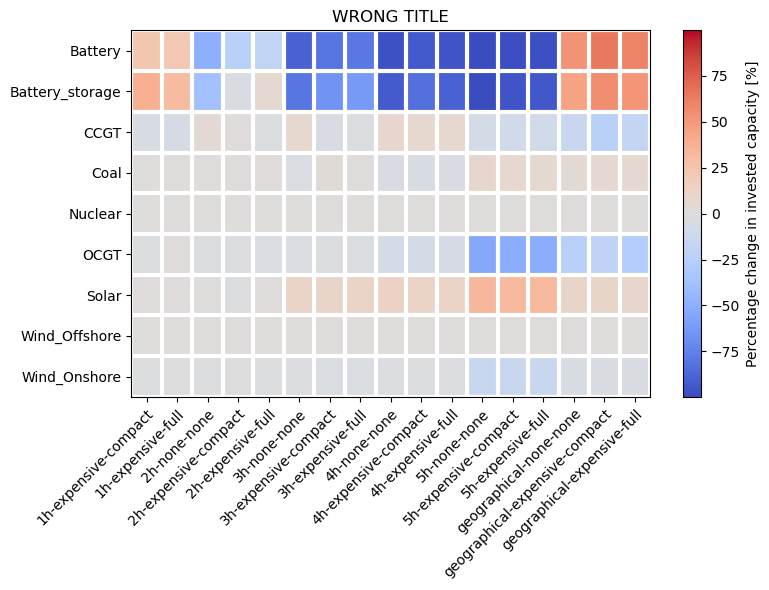

In [10]:
plot_heatmap(case_studies)

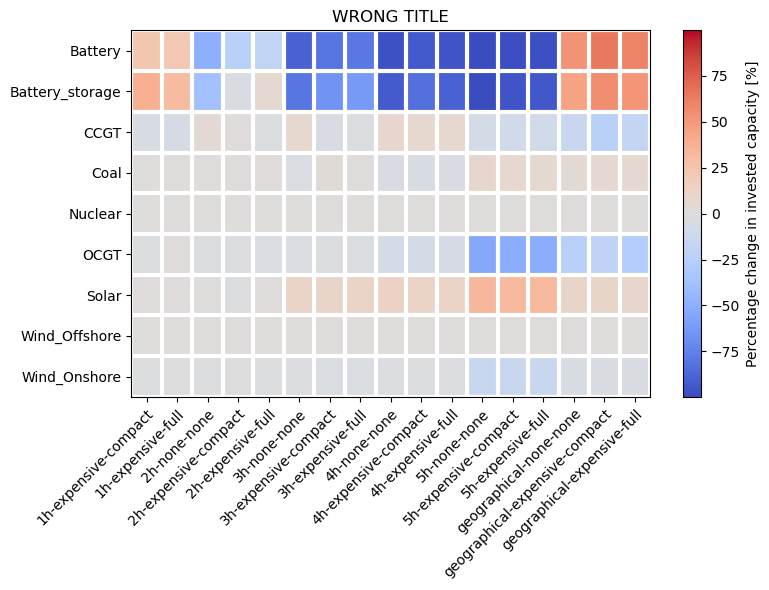

In [11]:
expensive_cases = [x for x in case_studies if 'expensive' in x or 'none' in x]
plot_heatmap(expensive_cases)

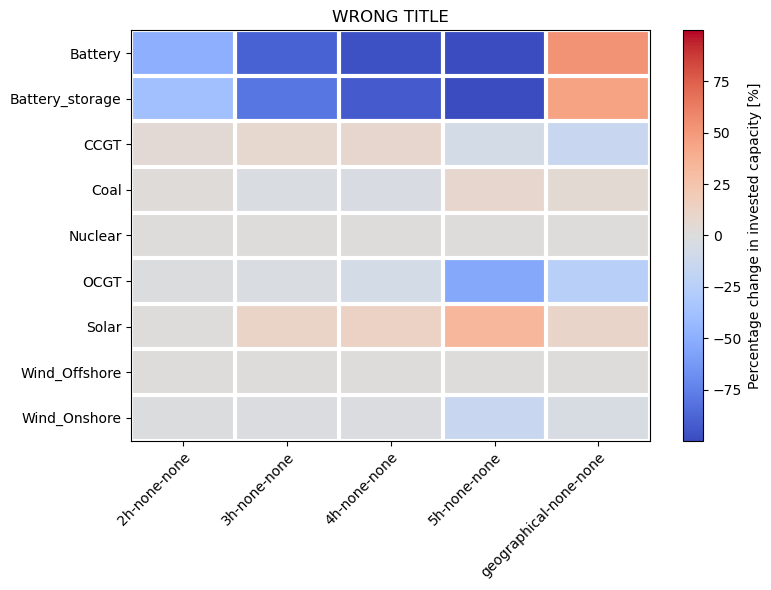

In [12]:
cheap_cases = [x for x in case_studies if 'cheap' in x or 'none' in x]
plot_heatmap(cheap_cases)

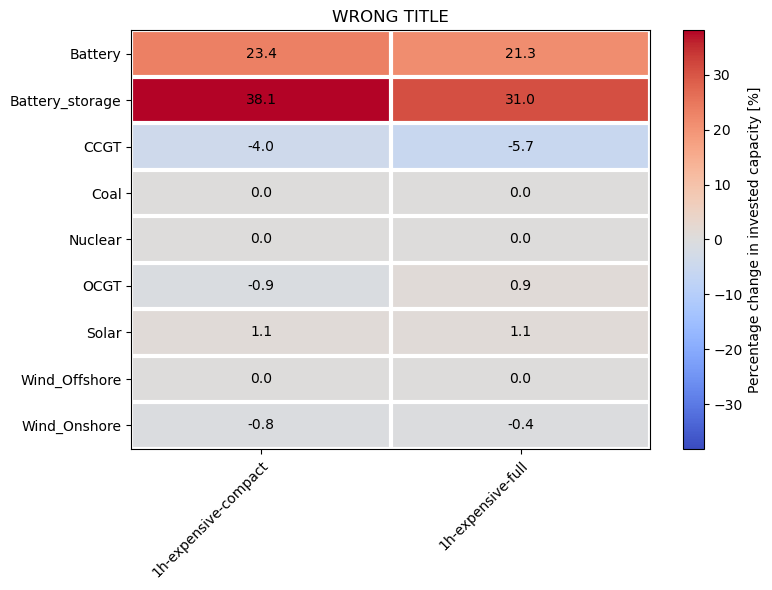

In [13]:
uniform_1h_cases = [x for x in case_studies if '1h' in x]
plot_heatmap(uniform_1h_cases, add_labels=True, angle=0)

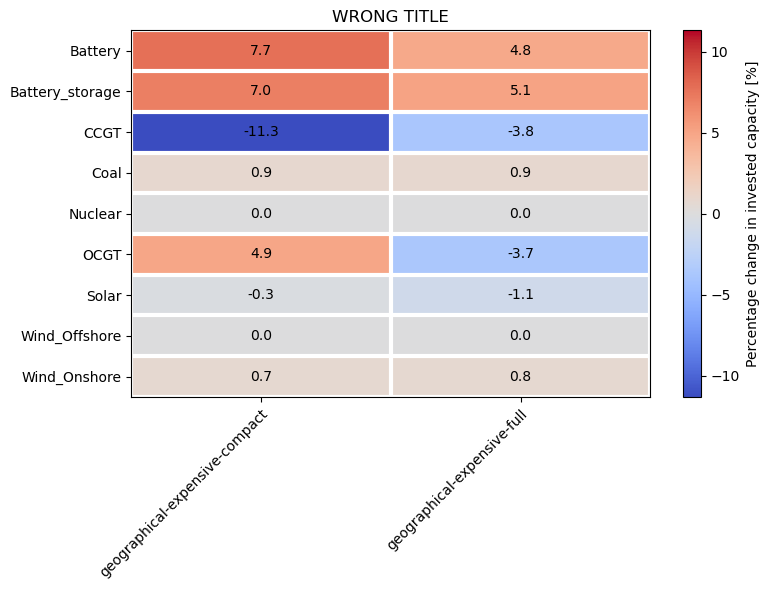

In [14]:
geo_cases = [x for x in case_studies if 'geographical' in x]
plot_heatmap(geo_cases, add_labels=True, angle=0)

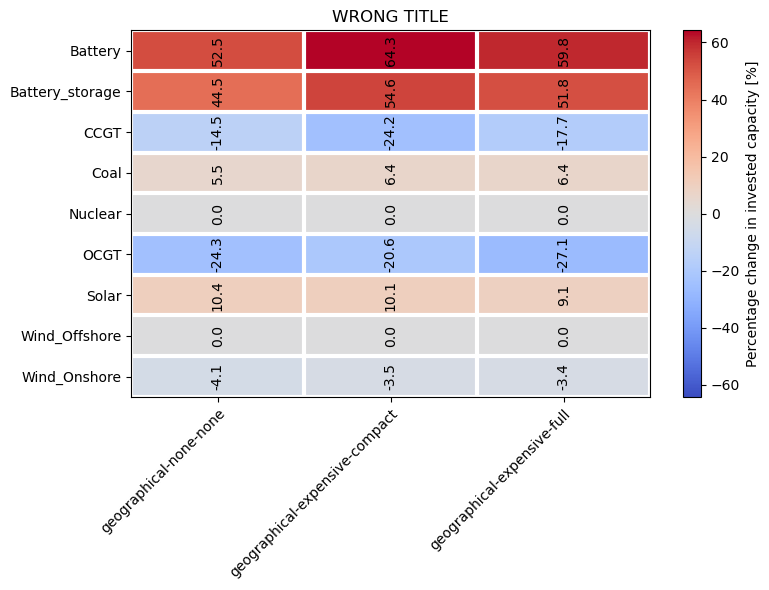

In [15]:
geo_cases = [case_studies[0], *[x for x in case_studies if 'geographical' in x]]
plot_heatmap(geo_cases, add_labels=True)

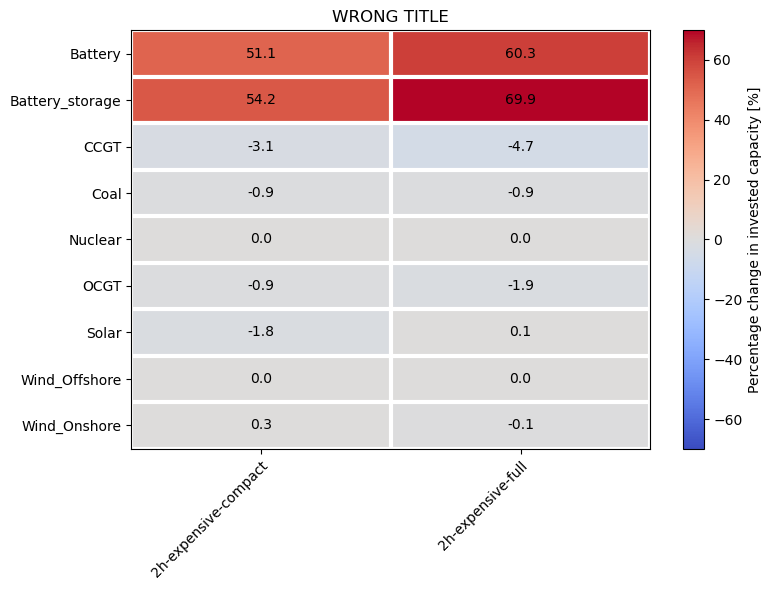

In [16]:
h2_cases = [x for x in case_studies if '2h' in x]
plot_heatmap(h2_cases, add_labels=True,angle=0)

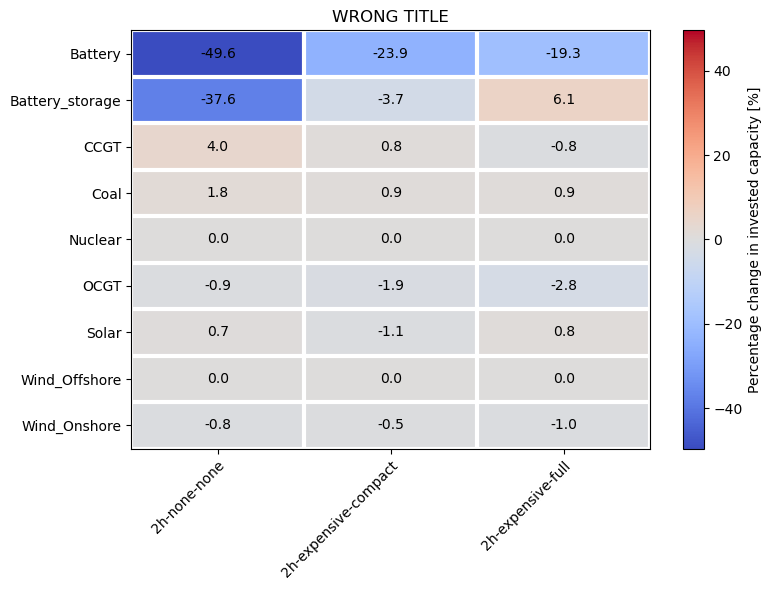

In [17]:
h2_cases = [case_studies[0], *[x for x in case_studies if '2h' in x]]
plot_heatmap(h2_cases, add_labels=True,angle=0)

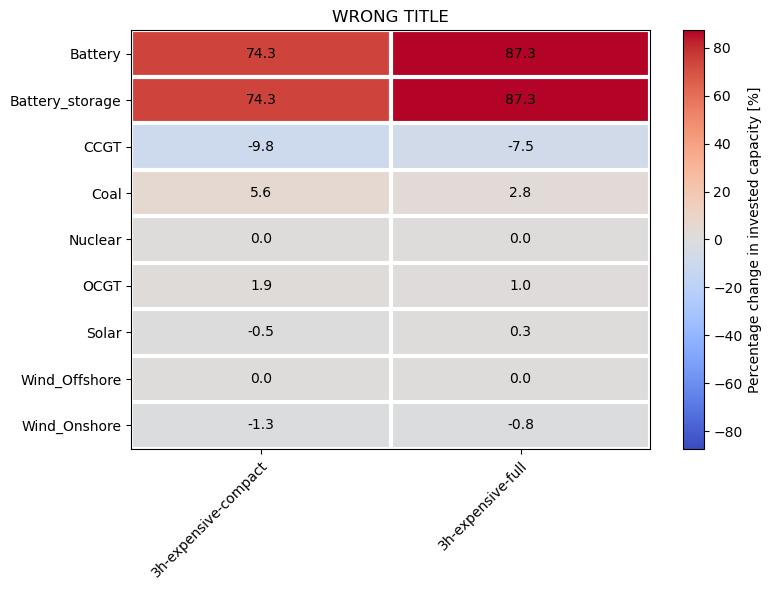

In [18]:
h3_cases = [x for x in case_studies if '3h' in x]
plot_heatmap(h3_cases, add_labels=True,angle=0)

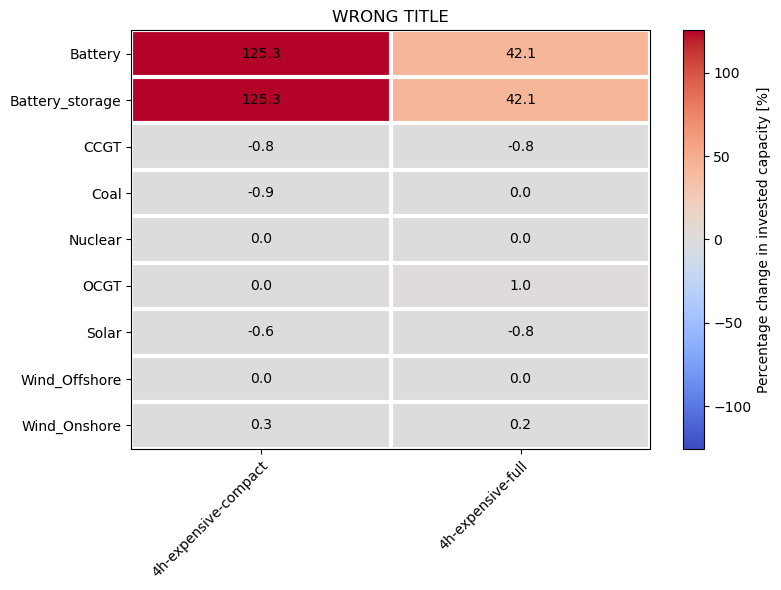

In [19]:
h4_cases = [x for x in case_studies if '4h' in x]
plot_heatmap(h4_cases, add_labels=True,angle=0)

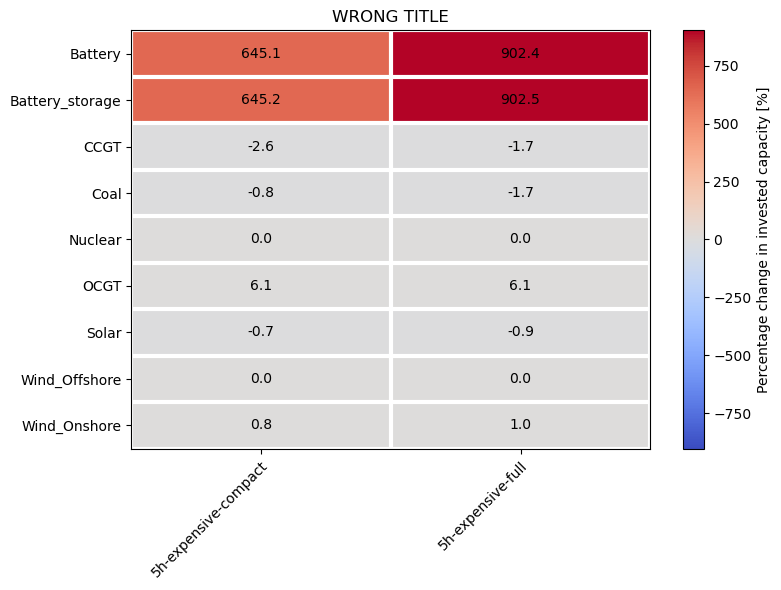

In [20]:
h5_cases = [x for x in case_studies if '5h' in x]
plot_heatmap(h5_cases, add_labels=True,angle=0)

In [21]:
capacity_sums_nl = []

for case_study in case_studies:
    df = pd.read_csv(results_base_dir + case_study+ "/" + "var_assets_investment" + '.csv')
    
    df = df[df['asset'].str.contains('NL')]
    
    df['asset_type'] = df['asset'].str[3:]
    df['total_capacity'] = df['capacity'] * df['solution']
    
    ###############
    df_extra = pd.read_csv(results_base_dir + case_study + "/" + "var_assets_investment_energy.csv")  
    
    df_extra['asset'] = df_extra['asset'] + '_storage'
    
    df_extra['asset_type'] = df_extra['asset'].str[3:]
    df_extra['total_capacity'] = df_extra['capacity_storage_energy'] * df_extra['solution']
    
    df_combined = pd.concat([df, df_extra], ignore_index=True)
    ###############
    
    
    capacity_sums_nl.append(df_combined.groupby('asset_type')['total_capacity'].sum().rename(case_study))

In [22]:
combined_investment_sums_nl = pd.concat(capacity_sums_nl, axis=1)

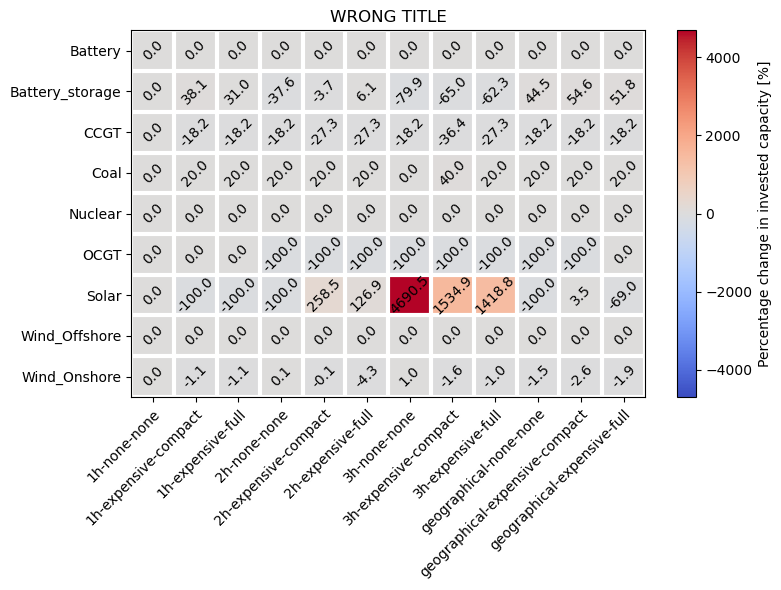

In [23]:
h1_h2_geo = [case_studies[0], *[x for x in case_studies if '2h' in x or '1h' in x or 'geographical' in x or '3h' in x]]
plot_heatmap(h1_h2_geo, combined_investment_sums=combined_investment_sums_nl,  add_labels=True,angle=45)

In [24]:
df = pd.read_csv(results_base_dir + case_studies[0]+ "/" + "var_assets_investment" + '.csv')

In [25]:
df[df['asset'] == 'NL_Battery']

,id,asset,milestone_year,investment_integer,capacity,investment_limit,solution
7,8,NL_Battery,2030,False,100.0,NaN,0.0


In [26]:
df = pd.read_csv(results_base_dir + case_studies[-1]+ "/" + "var_assets_investment" + '.csv')

In [27]:
df[df['asset'] == 'NL_Battery']

,id,asset,milestone_year,investment_integer,capacity,investment_limit,solution
7,8,NL_Battery,2030,False,100.0,NaN,0.0


In [28]:
df = pd.read_csv(results_base_dir + case_studies[-2]+ "/" + "var_assets_investment" + '.csv')

In [29]:
df[df['asset'] == 'NL_Battery']

,id,asset,milestone_year,investment_integer,capacity,investment_limit,solution
7,8,NL_Battery,2030,False,100.0,NaN,0.0


In [30]:
df = pd.read_csv(results_base_dir + case_studies[-5]+ "/" + "var_assets_investment" + '.csv')

In [31]:
df[df['asset'] == 'NL_Battery']

,id,asset,milestone_year,investment_integer,capacity,investment_limit,solution
7,8,NL_Battery,2030,False,100.0,NaN,0.0


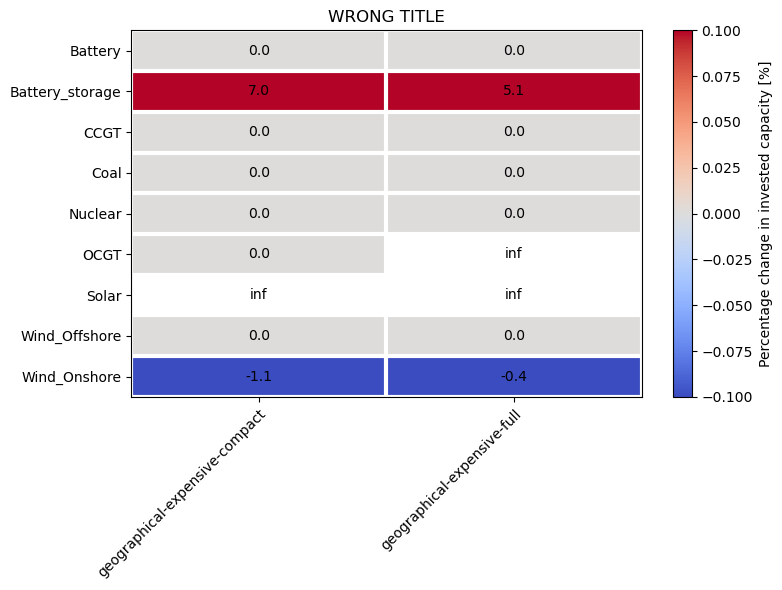

In [32]:
# THIS IS REASONABLE FOR RANDSEED BUT WEIRD FOR SEED 0
geo_nl = [x for x in case_studies if 'geographical' in x]
plot_heatmap(geo_nl, combined_investment_sums=combined_investment_sums_nl,  add_labels=True,angle=0)

['1h-none-noSUSD', '1h-expensive-relaxedSUSD', '1h-expensive-tightSUSD']


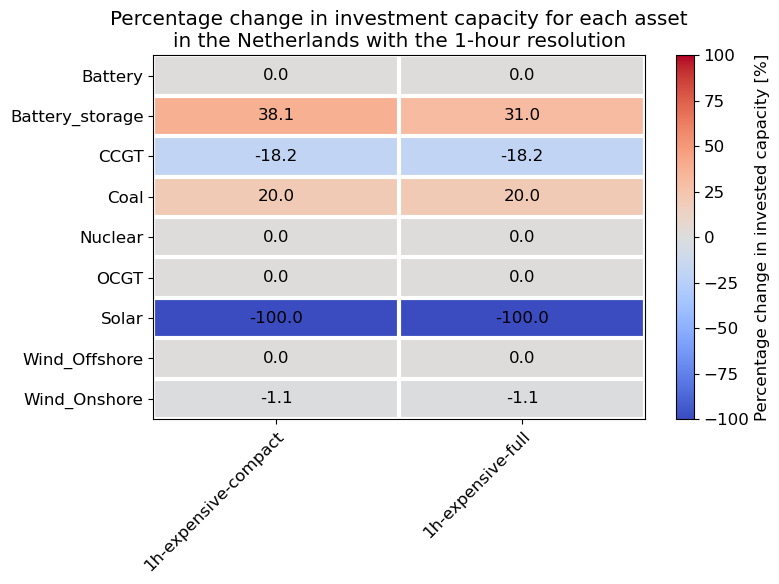

In [33]:
h1_nl = [x for x in case_studies if '1h' in x]
print(h1_nl)

plt.rcParams.update({'font.size': 12})

plot_heatmap(h1_nl, combined_investment_sums=combined_investment_sums_nl,  add_labels=True,angle=0, title="Percentage change in investment capacity for each asset\nin the Netherlands with the 1-hour resolution")

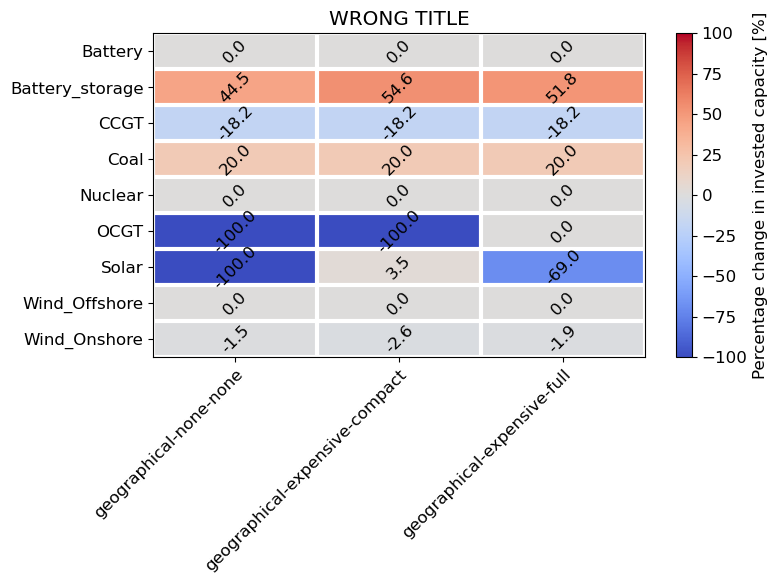

In [34]:
geo_nl = [case_studies[0], *[x for x in case_studies if 'geographical' in x]]
plot_heatmap(geo_nl, combined_investment_sums=combined_investment_sums_nl,  add_labels=True,angle=45)

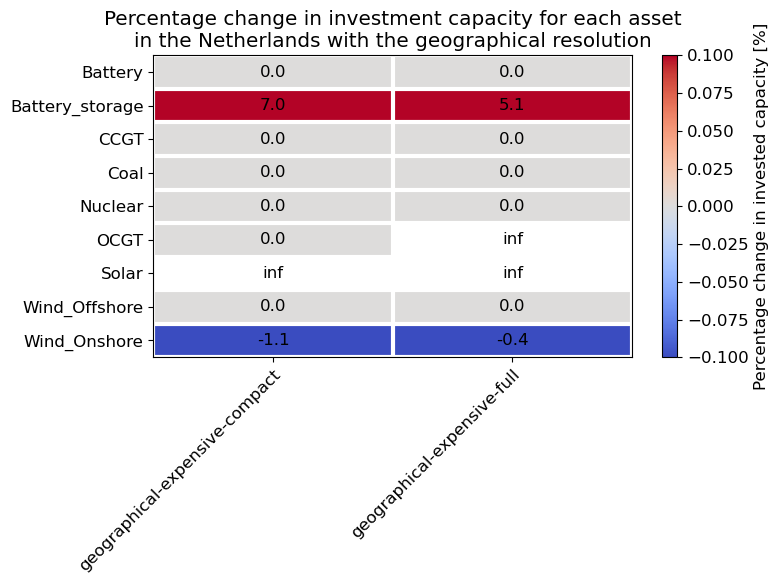

In [35]:
geo_nl =[x for x in case_studies if 'geographical' in x]
plot_heatmap(geo_nl, combined_investment_sums=combined_investment_sums_nl,  add_labels=True,angle=0, title="Percentage change in investment capacity for each asset\nin the Netherlands with the geographical resolution")

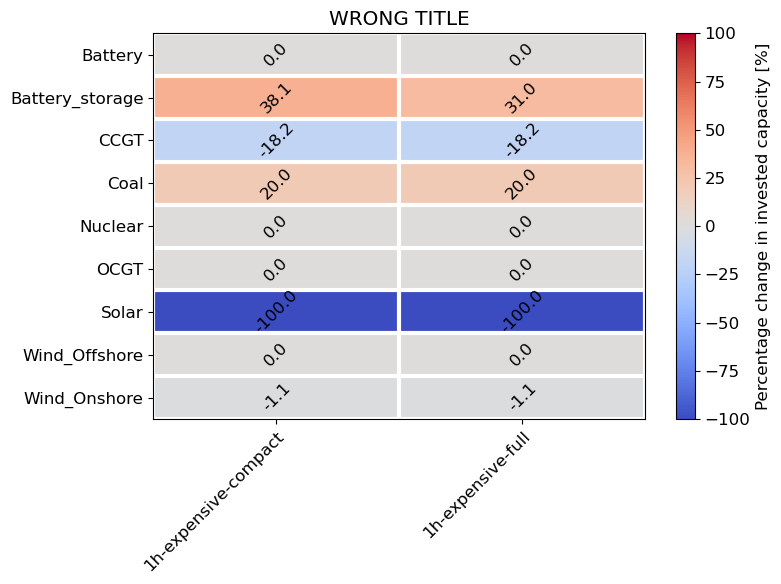

In [36]:
geo_nl = [x for x in case_studies if '1h' in x]
plot_heatmap(geo_nl, combined_investment_sums=combined_investment_sums_nl,  add_labels=True,angle=45)

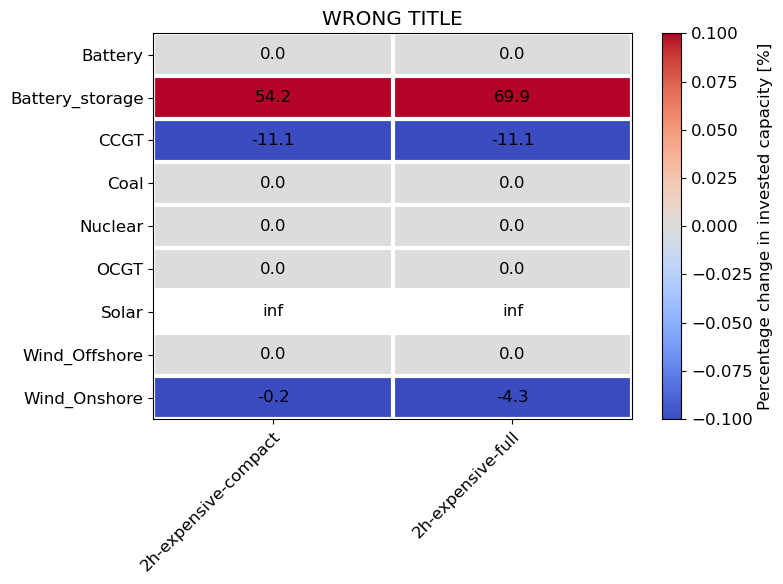

In [37]:
geo_nl = [x for x in case_studies if '2h' in x]
plot_heatmap(geo_nl, combined_investment_sums=combined_investment_sums_nl,  add_labels=True,angle=0)

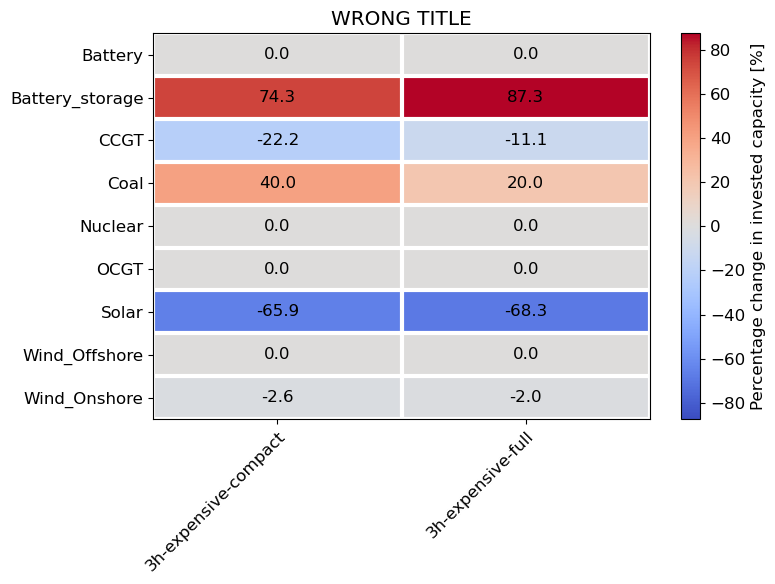

In [38]:
geo_nl = [x for x in case_studies if '3h' in x]
plot_heatmap(geo_nl, combined_investment_sums=combined_investment_sums_nl,  add_labels=True,angle=0)

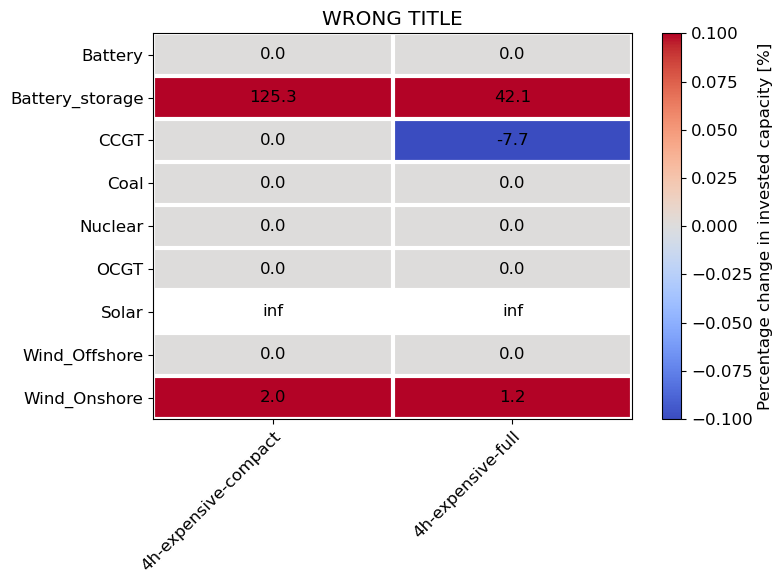

In [39]:
geo_nl = [x for x in case_studies if '4h' in x]
plot_heatmap(geo_nl, combined_investment_sums=combined_investment_sums_nl,  add_labels=True,angle=0)

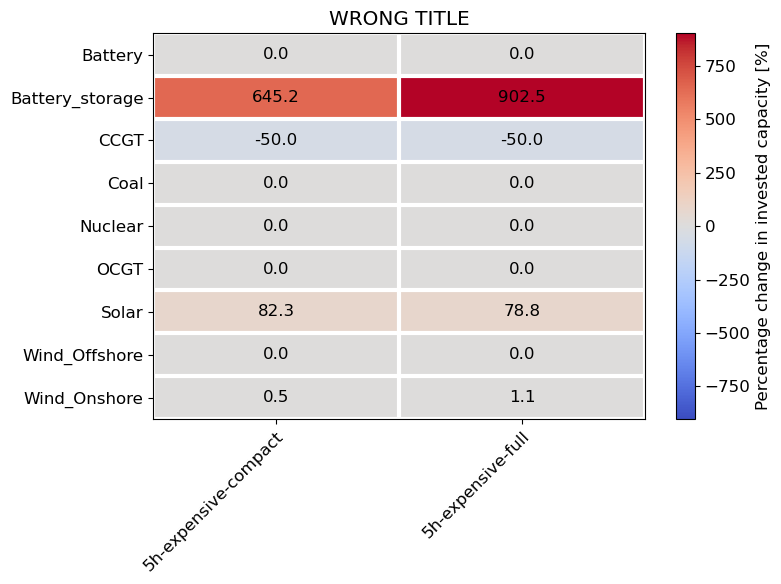

In [40]:
geo_nl = [x for x in case_studies if '5h' in x]
plot_heatmap(geo_nl, combined_investment_sums=combined_investment_sums_nl,  add_labels=True,angle=0)

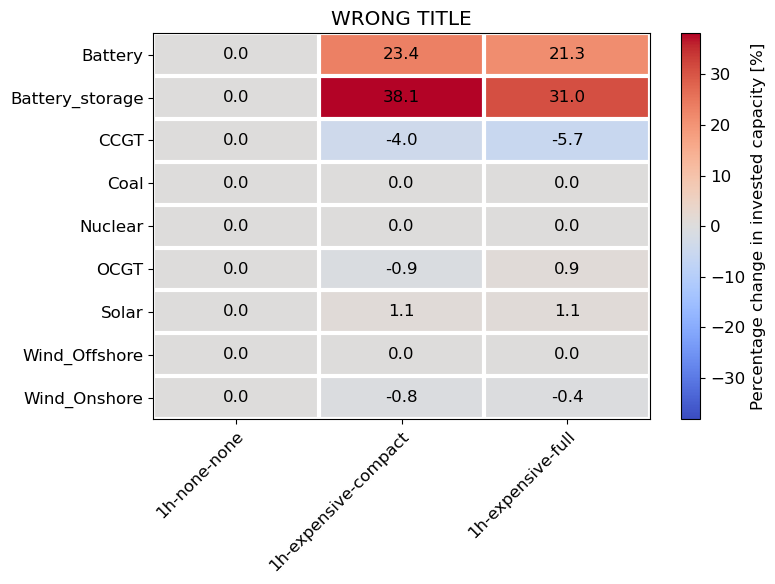

In [41]:
uniform_1h_cases = [case_studies[0], *[x for x in case_studies if '1h' in x]]
plot_heatmap(uniform_1h_cases, add_labels=True, angle=0)

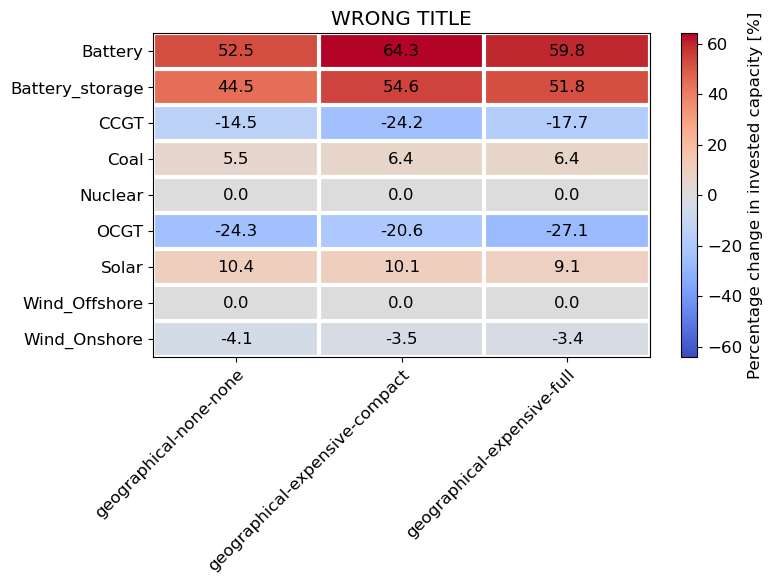

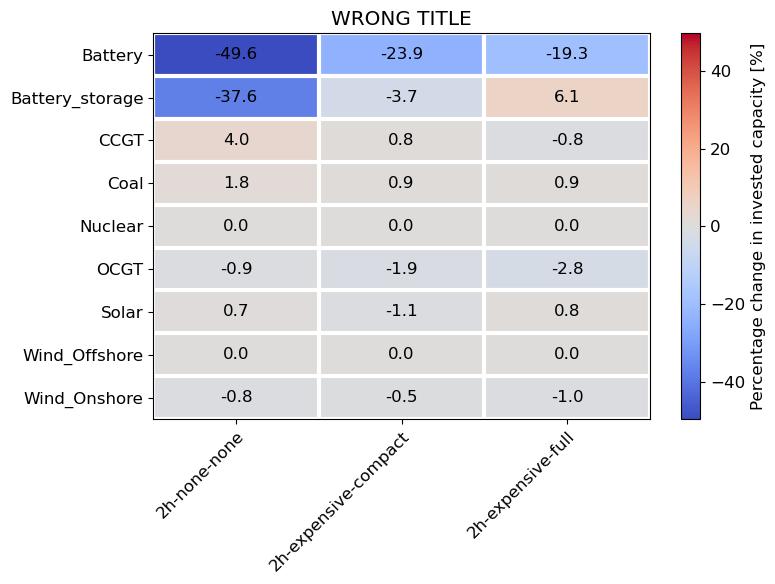

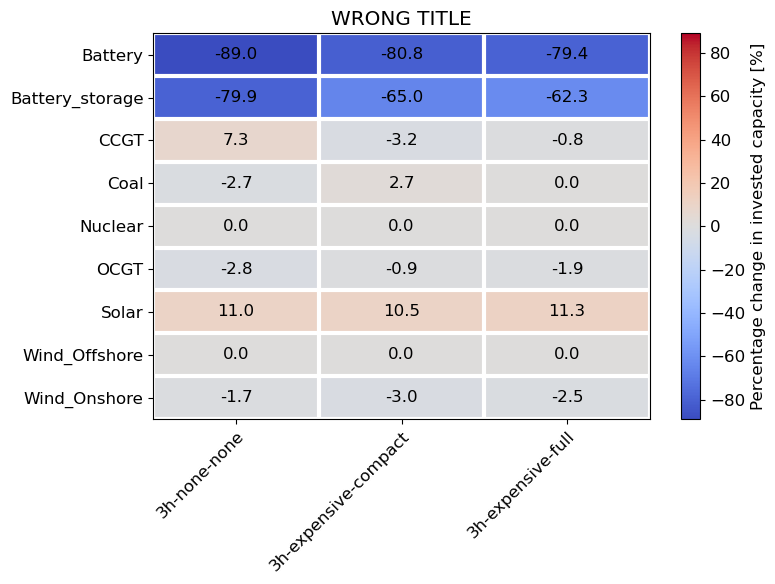

In [42]:
uniform_1h_cases = [case_studies[0], *[x for x in case_studies if 'geog' in x]]
plot_heatmap(uniform_1h_cases, add_labels=True, angle=0)

uniform_1h_cases = [case_studies[0], *[x for x in case_studies if '2h' in x]]
plot_heatmap(uniform_1h_cases, add_labels=True, angle=0)

uniform_1h_cases = [case_studies[0], *[x for x in case_studies if '3h' in x]]
plot_heatmap(uniform_1h_cases, add_labels=True, angle=0)

In [43]:
combined_investment_sums

,1h-none-noSUSD,1h-expensive-relaxedSUSD,1h-expensive-tightSUSD,2h-none-noSUSD,2h-expensive-relaxedSUSD,2h-expensive-tightSUSD,3h-none-noSUSD,3h-expensive-relaxedSUSD,3h-expensive-tightSUSD,4h-none-noSUSD,...,diff_4h-none-noSUSD,diff_4h-expensive-relaxedSUSD,diff_4h-expensive-tightSUSD,diff_5h-none-noSUSD,diff_5h-expensive-relaxedSUSD,diff_5h-expensive-tightSUSD,diff_geographical-none-noSUSD,diff_geographical-expensive-relaxedSUSD,diff_geographical-expensive-tightSUSD,diff_1h-none-noSUSD
asset_type,,,,,,,,,,,,,,,,,,,,,
Battery,16203.71,19993.08,19661.09,8158.95,12330.59,13075.87,1782.68,3107.36,3339.80,507.50,...,-96.868001,125.316256,42.147783,-99.802329,645.113956,902.372776,52.520565,64.264357,59.798836,0.0
Battery_storage,26605.37,36751.74,34848.44,16612.66,25612.67,28220.70,5348.03,9322.08,10019.41,2029.99,...,-92.369999,125.317366,42.147991,-99.398129,645.207019,902.510460,44.446666,54.588115,51.836753,0.0
CCGT,44268.00,42483.00,41769.00,46053.00,44625.00,43911.00,47481.00,42840.00,43911.00,47838.00,...,8.064516,-0.746269,-0.746269,-6.451613,-2.586207,-1.724138,-14.516129,-24.193548,-17.741935,0.0
Coal,90640.00,90640.00,90640.00,92288.00,91464.00,91464.00,88168.00,93112.00,90640.00,87344.00,...,-3.636364,-0.943396,0.000000,8.181818,-0.840336,-1.680672,5.454545,6.363636,6.363636,0.0
Nuclear,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OCGT,38199.00,37842.00,38556.00,37842.00,37485.00,37128.00,37128.00,37842.00,37485.00,35700.00,...,-6.542056,0.000000,1.000000,-54.205607,6.122449,6.122449,-24.299065,-20.560748,-27.102804,0.0
Solar,214749.21,217112.47,217020.93,216336.69,212351.20,216577.59,238390.30,237316.91,239058.61,242222.89,...,12.793379,-0.599939,-0.832378,33.421632,-0.708124,-0.915459,10.362990,10.070528,9.122148,0.0
Wind_Offshore,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wind_Onshore,717320.84,711276.96,714276.22,711371.43,713585.73,710384.63,704982.85,695773.80,699061.81,704877.60,...,-1.734683,0.329237,0.168360,-14.347958,0.748573,0.969609,-4.124591,-3.445633,-3.366814,0.0


In [44]:
# capacity_sums = []

# for case_study in case_studies:
#     df = pd.read_csv(results_base_dir + case_study+ "/" + "var_assets_investment" + '.csv')
    
#     df['asset_type'] = df['asset'].str[3:]
#     df['total_capacity'] = df['capacity'] * df['solution']
    
    
#     ##########################
#     df_extra = pd.read_csv(results_base_dir + case_study + "/" + "var_assets_investment_energy.csv")
    
#     df_extra['asset'] = df_extra['asset'] + '_storage'
    
#     df_extra['asset_type'] = df_extra['asset'].str[3:]
#     df_extra['total_capacity'] = df_extra['capacity_storage_energy'] * df_extra['solution']
    
#     df_combined = pd.concat([df, df_extra], ignore_index=True)
    
#     ############################
    
    
#     capacity_sums.append(df_combined.groupby('asset_type')['total_capacity'].sum().rename(case_study))
    

In [45]:
# combined_investment_sums_expensive = pd.concat(capacity_sums, axis=1)

In [46]:
# for case_study in case_studies:
#     if case_study == '1h-expensive-tightSUSD':
#         continue
        
#     combined_investment_sums_expensive[f'diff_{case_study}'] = 100 * (combined_investment_sums_expensive[case_study] - combined_investment_sums_expensive[case_studies[4]]) / combined_investment_sums_expensive[case_studies[4]]

In [47]:
# combined_investment_sums_expensive

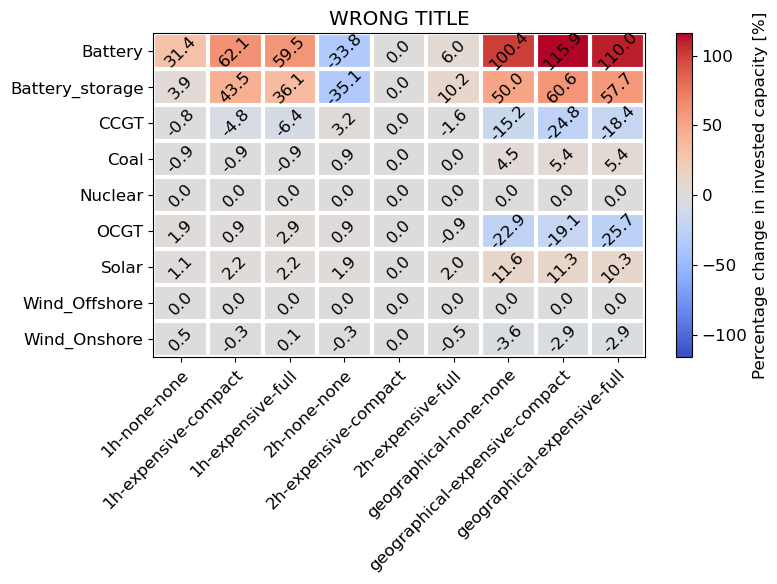

In [48]:
uniform_1h_cases = [case_studies[4], *[x for x in case_studies if '1h' in x or '2h' in x or 'geo' in x]]
plot_heatmap(uniform_1h_cases, add_labels=True, angle=45)

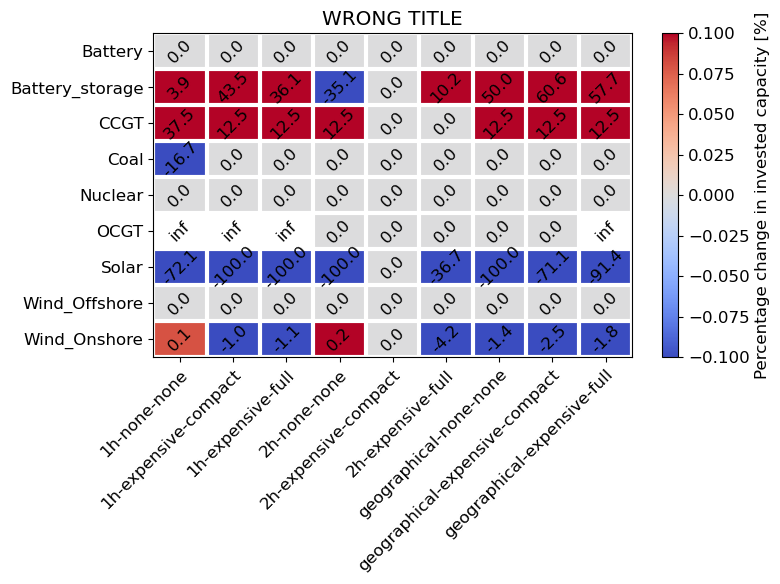

In [49]:
uniform_1h_cases = [case_studies[4], *[x for x in case_studies if ('1h' in x or '2h' in x or 'geo' in x)]]
plot_heatmap(uniform_1h_cases, combined_investment_sums=combined_investment_sums_nl, add_labels=True, angle=45)

### CHANGE IN INVESTMENT PLAN FROM 1H-EXPENSIVE-TIGHT TO ALL OTHER NON-CHEAP CASES, NL ONLY

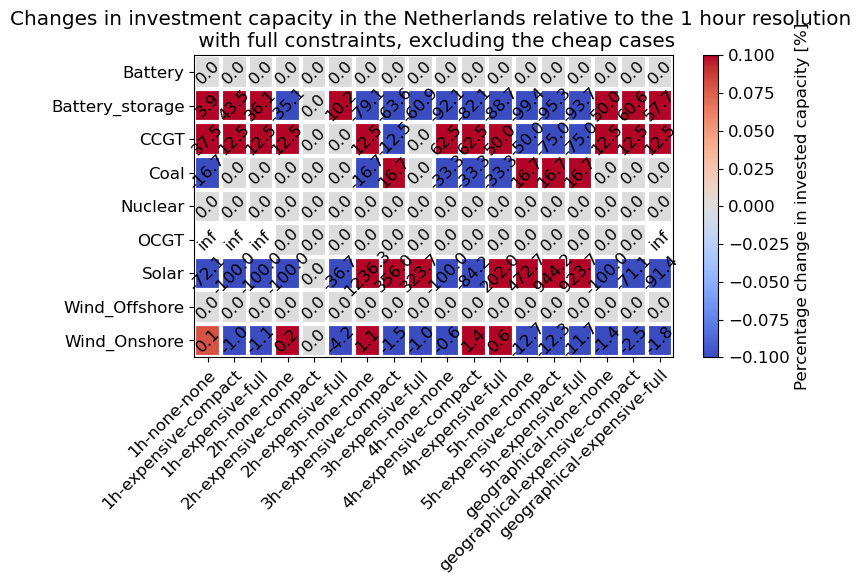

In [50]:
uniform_1h_cases = [case_studies[4], *[x for x in case_studies if 'cheap' not in x]]
plot_heatmap(uniform_1h_cases, combined_investment_sums=combined_investment_sums_nl, add_labels=True, angle=45, title="Changes in investment capacity in the Netherlands relative to the 1 hour resolution \n with full constraints, excluding the cheap cases")

### CHANGE IN INVESTMENT PLAN FROM 1H-CHEAP-TIGHT TO ALL OTHER NON-EXPENSIVE CASES, NL ONLY

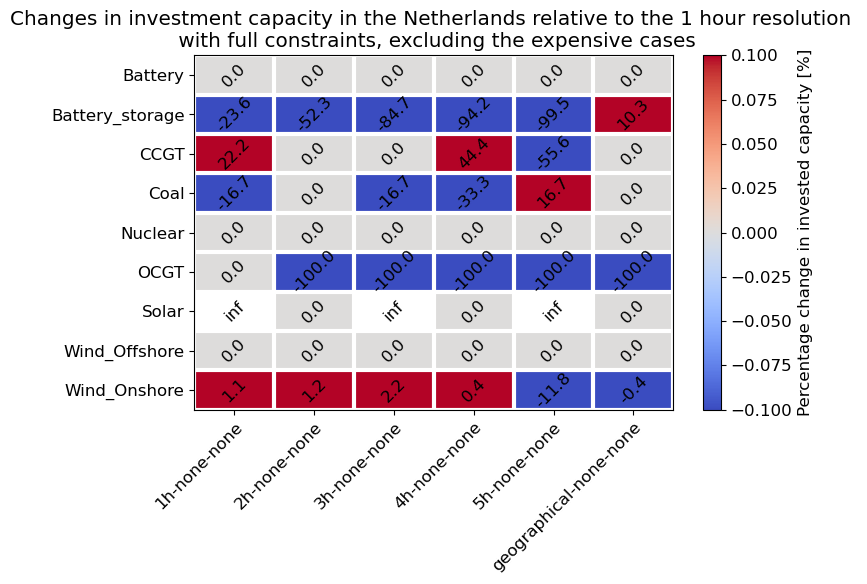

In [51]:
uniform_1h_cases = [case_studies[2], *[x for x in case_studies if 'expensive' not in x]]
plot_heatmap(uniform_1h_cases, combined_investment_sums=combined_investment_sums_nl, add_labels=True, angle=45, title="Changes in investment capacity in the Netherlands relative to the 1 hour resolution \n with full constraints, excluding the expensive cases")

### CHANGE IN INVESTMENT PLAN FROM 1H-EXPENSIVE-TIGHT TO ALL OTHER NON-CHEAP CASES, ALL COUNTRIES

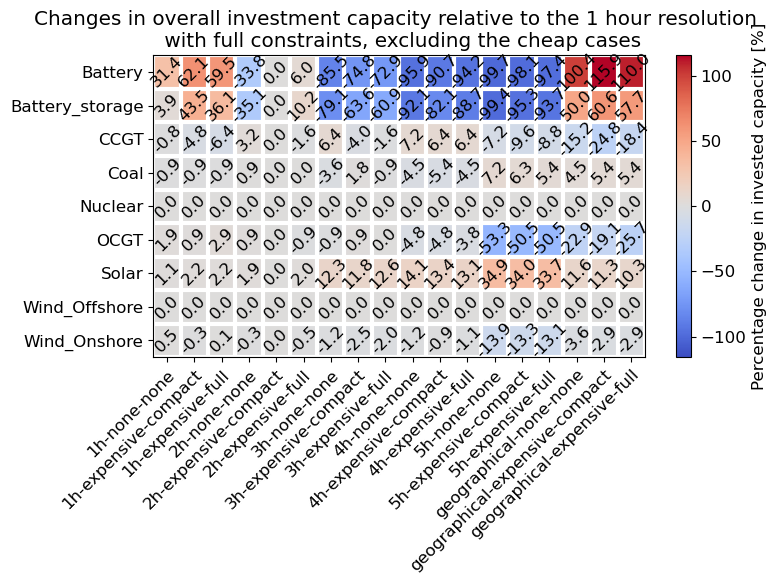

In [52]:
uniform_1h_cases = [case_studies[4], *[x for x in case_studies if 'cheap' not in x]]
plot_heatmap(uniform_1h_cases, add_labels=True, angle=45,  title="Changes in overall investment capacity relative to the 1 hour resolution \n with full constraints, excluding the cheap cases")

### CHANGE IN INVESTMENT PLAN FROM 1H-CHEAP-TIGHT TO ALL OTHER NON-CHEAP CASES, ALL COUNTRIES

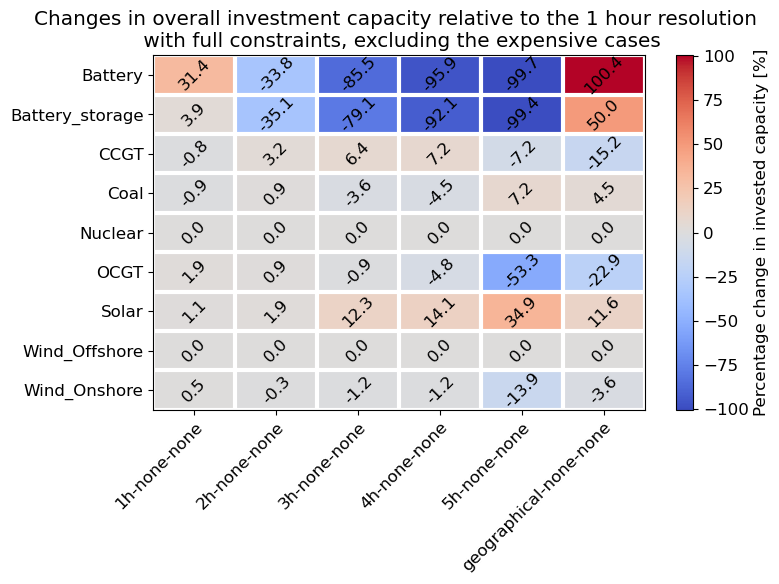

In [53]:
uniform_1h_cases = [case_studies[4], *[x for x in case_studies if 'expensive' not in x]]
plot_heatmap(uniform_1h_cases, add_labels=True, angle=45,  title="Changes in overall investment capacity relative to the 1 hour resolution \n with full constraints, excluding the expensive cases")